#Mempersiapkan Data Mentah

In [1]:
!pip install facenet-pytorch
!pip install datasets==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.15
    Uninstalling multiprocess-0.70.15:
      Successfully uninstalled multiprocess-0.70.15
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4


## Data Sekunder dari Hugging Face

In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from PIL import Image

from datasets import load_dataset

# Download dataset
dataset = load_dataset("nguyenkhoa/antispoofing-3", split="train")

# Cek apakah ukuran gambar lebih besar dari 240x240
def is_large_image(example):
    image = example["image"]
    return image.size[0] > 240 and image.size[1] > 240

# Filter gambar yang ukurannya besar
filtered_dataset = dataset.filter(is_large_image)

# Tampilkan 5 contoh gambar
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, example in enumerate(filtered_dataset.shuffle(seed=42).select(range(5))):
    image = example["image"]
    axes[i].imshow(image)
    axes[i].axis("off")
plt.show()

# Ambil 10.000 data pertama untuk pelatihan
dataset = filtered_dataset.select(range(10000))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/93964 [00:00<?, ? examples/s]

Generating eval split:   0%|          | 0/10441 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to file:///root/.cache/huggingface/datasets/nguyenkhoa___parquet/nguyenkhoa--antispoofing-3-6e4bd30870b3efcf/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported.

In [ ]:
from collections import Counter

# Hitung jumlah label pada dataset yang sudah difilter
label_counts = Counter(dataset["label"])

# Tampilkan hasilnya
print(f"Jumlah data live  : {label_counts[0]}")
print(f"Jumlah data spoof : {label_counts[1]}")

## Data Primer dari Webcam

In [ ]:
import os

def count_images_in_folder(root_folder):
    total_count = 0
    class_counts = {}

    for class_name in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_name)
        if not os.path.isdir(class_path):
            continue

        count = sum(
            1 for file in os.listdir(class_path)
            if file.lower().endswith(('.jpg', '.jpeg', '.png'))
        )
        class_counts[class_name] = count
        total_count += count

    return class_counts, total_count

# Ganti path sesuai lokasi dataset kamu
folder_path = "/content/dataset/"

counts, total = count_images_in_folder(folder_path)

print("Jumlah gambar per kelas:")
for cls, cnt in counts.items():
    print(f"  {cls}: {cnt} file")

print(f"Total semua gambar: {total} file")

Jumlah gambar per kelas:
  real: 100 file
  spoof: 100 file
  .ipynb_checkpoints: 0 file
Total semua gambar: 200 file


# Mempersiapkan dataset

## Dataset untuk Train Awal

Output streaming akan dipotong hingga 5000 baris terakhir.
MTCNN Bounding Box: 150, 250, 258, 387
Finished processing image 8743
Processing 8744th image
Found 1 faces in image 8744
MTCNN Bounding Box: 187, 47, 327, 240
Finished processing image 8744
Processing 8745th image
Found 1 faces in image 8745
MTCNN Bounding Box: 259, 146, 429, 350
Finished processing image 8745
Processing 8746th image
Found 1 faces in image 8746
MTCNN Bounding Box: 53, 108, 390, 571
Finished processing image 8746
Processing 8747th image
Found 2 faces in image 8747
MTCNN Bounding Box: 157, 101, 309, 306
Finished processing image 8747
Processing 8748th image
Found 1 faces in image 8748
MTCNN Bounding Box: 136, 199, 328, 465
Finished processing image 8748
Processing 8749th image
Found 1 faces in image 8749
MTCNN Bounding Box: 126, 50, 268, 228
Finished processing image 8749
Processing 8750th image
Found 1 faces in image 8750
MTCNN Bounding Box: 53, 134, 351, 487
Finished processing image 8750
Processing 8751th ima

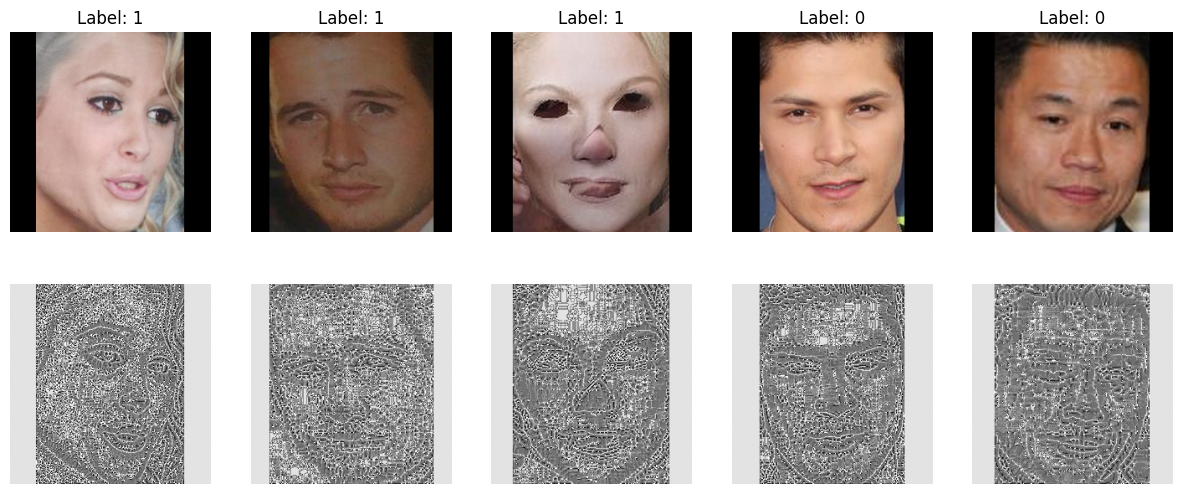

In [ ]:
import torch
from facenet_pytorch import MTCNN
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Inisialisasi MTCNN untuk deteksi wajah
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)

# Fungsi untuk ekstraksi LBP
def get_lbp(image, radius=1, n_points=8):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    return lbp

# Fungsi untuk resize dengan padding agar aspect ratio tetap terjaga
def resize_with_padding(image, target_size=(240, 240)):
    old_size = image.size
    ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])
    new_size = (int(old_size[0] * ratio), int(old_size[1] * ratio))

    resized_image = image.resize(new_size, Image.LANCZOS)

    new_image = Image.new("RGB", target_size, (0, 0, 0))
    new_image.paste(resized_image, ((target_size[0] - new_size[0]) // 2,
                                    (target_size[1] - new_size[1]) // 2))
    return new_image

# Fungsi untuk proses dataset
def prepare_dataset(dataset):
    data = []
    for i, item in enumerate(dataset):
        print(f'Processing {i}th image')

        image = item['image']
        label = item['labels']

        faces, _ = mtcnn.detect(image)
        if faces is not None:
            print(f'Found {len(faces)} faces in image {i}')

            # Pilih wajah terbesar
            largest_face = max(faces, key=lambda box: (box[2] - box[0]) * (box[3] - box[1]))
            x1, y1, x2, y2 = [int(coord) for coord in largest_face]

            # Debugging bounding box
            print(f"MTCNN Bounding Box: {x1}, {y1}, {x2}, {y2}")

            face = image.crop((x1, y1, x2, y2))
            if face.size == (0, 0):
                continue

            # Resize dengan padding
            face = resize_with_padding(face, (240, 240))

            # Ekstraksi LBP
            face_np = np.array(face)
            lbp = get_lbp(face_np)

            data.append({
                'RGB': face,
                'LBP': Image.fromarray(lbp.astype(np.uint8)),
                'label': label
            })
        else:
            print(f'No faces found in image {i}')

        print(f'Finished processing image {i}')

    return pd.DataFrame(data)

# Fungsi untuk menampilkan gambar
def display_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    for i, row in enumerate(dataset.head(num_samples).itertuples()):
        axes[0, i].imshow(row.RGB)
        axes[0, i].set_title(f"Label: {row.label}")
        axes[0, i].axis('off')

        axes[1, i].imshow(row.LBP, cmap='gray')
        axes[1, i].axis('off')

    axes[0, 0].set_ylabel('RGB Images')
    axes[1, 0].set_ylabel('LBP Images')
    plt.show()

# Contoh penggunaan
new_dataset = prepare_dataset(dataset)
print(new_dataset.head())
display_samples(new_dataset)

## Dataset untuk Train Tambahan / dari Data Primer (Data dari Webcam)

In [5]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from facenet_pytorch import MTCNN
from skimage.feature import local_binary_pattern

# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=False, device=device)  # hanya ambil 1 wajah

# Fungsi LBP
def get_lbp(image, radius=1, n_points=8):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    return lbp

# Resize dengan padding
def resize_with_padding(image, target_size=(240, 240)):
    old_size = image.size
    ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])
    new_size = (int(old_size[0] * ratio), int(old_size[1] * ratio))
    resized_image = image.resize(new_size, Image.LANCZOS)
    new_image = Image.new("RGB", target_size, (0, 0, 0))
    new_image.paste(resized_image, ((target_size[0] - new_size[0]) // 2,
                                    (target_size[1] - new_size[1]) // 2))
    return new_image

# Load dataset dari folder
def prepare_dataset_from_folder(folder_path):
    data = []
    classes = {'real': 0, 'spoof': 1}

    for label_name, label_val in classes.items():
        subfolder = os.path.join(folder_path, label_name)
        if not os.path.exists(subfolder):
            continue

        for filename in tqdm(os.listdir(subfolder), desc=f'Processing {label_name}'):
            if not filename.lower().endswith((".jpg", ".png", ".jpeg")):
                continue

            img_path = os.path.join(subfolder, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                boxes, _ = mtcnn.detect(img)

                if boxes is not None:
                    x1, y1, x2, y2 = [int(b) for b in boxes[0]]
                    face = img.crop((x1, y1, x2, y2))
                    if face.size == (0, 0):
                        continue

                    face = resize_with_padding(face, (240, 240))
                    face_np = np.array(face)
                    lbp = get_lbp(face_np)

                    data.append({
                        'RGB': face,
                        'LBP': Image.fromarray(lbp.astype(np.uint8)),
                        'label': label_val
                    })
            except Exception as e:
                print(f"Error on {img_path}: {e}")

    return pd.DataFrame(data)
adjust_dataset = prepare_dataset_from_folder('/content/dataset')

Processing spoof: 100%|██████████| 100/100 [00:11<00:00,  8.78it/s]


#Mempersiapkan Model NN Anti-Spoofing

## Mempersiapkan Model DualInputCNN Awal (Sesuai Penelitian Sebelumnya)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DualInputCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(DualInputCNN, self).__init__()

        # Jalur RGB
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1)

        # Jalur LBP
        self.conv1_lbp = nn.Conv2d(1, 64, kernel_size=3, padding=1, stride=1)
        self.conv2_lbp = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)
        self.conv3_lbp = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1)

        # Konvolusi setelah penggabungan dua jalur
        self.conv4 = nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1)

        # Adaptive pooling dan fully connected layer
        self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, rgb_input, lbp_input):
        # Forward jalur RGB
        x1 = F.relu(self.conv1(rgb_input))
        x1 = self.pool(x1)
        x1 = F.relu(self.conv2(x1))
        x1 = self.pool(x1)
        x1 = F.relu(self.conv3(x1))
        x1 = self.pool(x1)

        # Forward jalur LBP
        x2 = F.relu(self.conv1_lbp(lbp_input))
        x2 = self.pool(x2)
        x2 = F.relu(self.conv2_lbp(x2))
        x2 = self.pool(x2)
        x2 = F.relu(self.conv3_lbp(x2))
        x2 = self.pool(x2)

        # Gabungkan dua jalur
        x = torch.cat((x1, x2), dim=1)

        # Konvolusi gabungan
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)

        # Pooling, flatten, dan FC
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

# Model instantiation
model = DualInputCNN(num_classes=2)
print(model)

DualInputCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_lbp): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_lbp): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_lbp): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(7, 7))
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)


## Mempersiapkan Custom Model DualInputCNN

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DualInputCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(DualInputCNN, self).__init__()

        # Jalur RGB
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1)
        self.dropout_conv1 = nn.Dropout(p=0.3)

        # Jalur LBP
        self.conv1_lbp = nn.Conv2d(1, 64, kernel_size=3, padding=1, stride=1)
        self.conv2_lbp = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)
        self.conv3_lbp = nn.Conv2d(128, 256, kernel_size=3, padding=1, stride=1)
        self.dropout_conv2 = nn.Dropout(p=0.3)

        # Konvolusi setelah penggabungan dua jalur
        self.conv4 = nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1)
        self.conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1, stride=1)
        self.dropout_conv3 = nn.Dropout(p=0.3)

        # Adaptive pooling dan fully connected layer
        self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.dropout1 = nn.Dropout(p=0.4)
        self.fc2 = nn.Linear(512, 128)
        self.dropout2 = nn.Dropout(p=0.4)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, rgb_input, lbp_input):
        # Forward jalur RGB
        x1 = F.relu(self.conv1(rgb_input))
        x1 = self.pool(x1)
        x1 = F.relu(self.conv2(x1))
        x1 = self.pool(x1)
        x1 = F.relu(self.conv3(x1))
        x1 = self.pool(x1)
        x1 = self.dropout_conv1(x1)

        # Forward jalur LBP
        x2 = F.relu(self.conv1_lbp(lbp_input))
        x2 = self.pool(x2)
        x2 = F.relu(self.conv2_lbp(x2))
        x2 = self.pool(x2)
        x2 = F.relu(self.conv3_lbp(x2))
        x2 = self.pool(x2)
        x2 = self.dropout_conv2(x2)

        # Gabungkan dua jalur
        x = torch.cat((x1, x2), dim=1)

        # Konvolusi gabungan
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = self.dropout_conv3(x)

        # Pooling, flatten, dan FC
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)

        return x

# Model instantiation
model = DualInputCNN(num_classes=2)
print(model)

DualInputCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_conv1): Dropout(p=0.3, inplace=False)
  (conv1_lbp): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_lbp): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_lbp): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_conv2): Dropout(p=0.3, inplace=False)
  (conv4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_conv3): Dropout(p=0.3, inplace=False)
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(7, 7))
  (fc1): Linear(in_features=25088, out_features=512, bias=Tru

# Training Model

##Training Awal

Epoch [1/200] - Loss: 0.5623, Val Loss: 0.4514
Epoch [2/200] - Loss: 0.4542, Val Loss: 0.4945
Epoch [3/200] - Loss: 0.4424, Val Loss: 0.4109
Epoch [4/200] - Loss: 0.4303, Val Loss: 0.4140
Epoch [5/200] - Loss: 0.4187, Val Loss: 0.3969
Epoch [6/200] - Loss: 0.4110, Val Loss: 0.4120
Epoch [7/200] - Loss: 0.4032, Val Loss: 0.3453
Epoch [8/200] - Loss: 0.3899, Val Loss: 0.3478
Epoch [9/200] - Loss: 0.3836, Val Loss: 0.3513
Epoch [10/200] - Loss: 0.3821, Val Loss: 0.3481
Epoch [11/200] - Loss: 0.3709, Val Loss: 0.3223
Epoch [12/200] - Loss: 0.3668, Val Loss: 0.3255
Epoch [13/200] - Loss: 0.3540, Val Loss: 0.3118
Epoch [14/200] - Loss: 0.3477, Val Loss: 0.2845
Epoch [15/200] - Loss: 0.3417, Val Loss: 0.3045
Epoch [16/200] - Loss: 0.3454, Val Loss: 0.2985
Epoch [17/200] - Loss: 0.3332, Val Loss: 0.2817
Epoch [18/200] - Loss: 0.3318, Val Loss: 0.2753
Epoch [19/200] - Loss: 0.3227, Val Loss: 0.2791
Epoch [20/200] - Loss: 0.3179, Val Loss: 0.2814
Epoch [21/200] - Loss: 0.3086, Val Loss: 0.2572
E

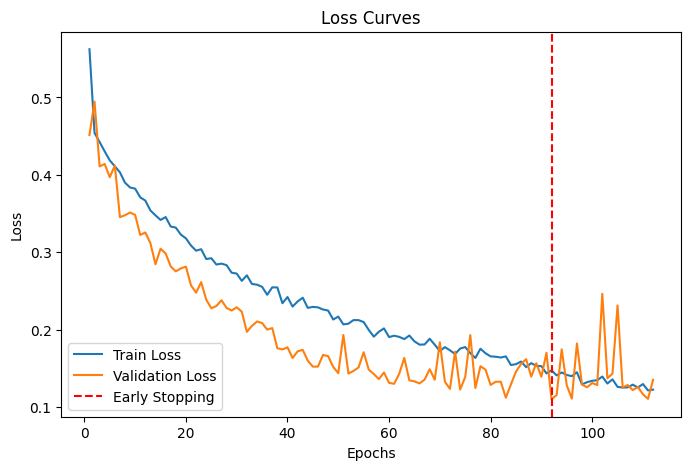

Best model saved to 'dual_input_cnn_01.pth'
Test Accuracy: 94.51%


In [ ]:
# Import library yang dibutuhkan
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Kelas dataset kustom untuk memuat data RGB, LBP, dan label
class SpoofDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        rgb_image = row['RGB']
        lbp_image = row['LBP']
        label = torch.tensor(row['label'], dtype=torch.long)

        if self.transform:
            rgb_image = self.transform(rgb_image)
            lbp_image = self.transform(lbp_image)

        return rgb_image, lbp_image, label

# Membagi dataset menjadi train, val, dan test
train_df, temp_df = train_test_split(new_dataset, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Transformasi data untuk training (augmentasi)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=(240, 240), scale=(0.8, 1.0)),
    transforms.ToTensor()
])

# Transformasi untuk validasi dan testing (tanpa augmentasi)
test_transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor()
])

# Membuat objek dataset
train_dataset = SpoofDataset(train_df, transform=train_transform)
val_dataset = SpoofDataset(val_df, transform=test_transform)
test_dataset = SpoofDataset(test_df, transform=test_transform)

# DataLoader untuk training, validasi, dan testing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Fungsi pelatihan model dengan early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=100, patience=10):
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    patience_counter = 0
    early_stopping_epoch = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        # Training loop
        for rgb_images, lbp_images, labels in train_loader:
            rgb_images, lbp_images, labels = rgb_images.to(device), lbp_images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(rgb_images, lbp_images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        # Validation loop
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for rgb_images, lbp_images, labels in val_loader:
                rgb_images, lbp_images, labels = rgb_images.to(device), lbp_images.to(device), labels.to(device)
                outputs = model(rgb_images, lbp_images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Cek early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            early_stopping_epoch = epoch + 1
            torch.save(model.state_dict(), 'dual_input_cnn_01.pth')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Visualisasi kurva loss
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("Best model saved to 'dual_input_cnn_01.pth'")

# Fungsi evaluasi model pada data test
def evaluate_model(model, test_loader, device):
    model.load_state_dict(torch.load('dual_input_cnn_01.pth'))
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for rgb_images, lbp_images, labels in test_loader:
            rgb_images, lbp_images, labels = rgb_images.to(device), lbp_images.to(device), labels.to(device)
            outputs = model(rgb_images, lbp_images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Inisialisasi model, loss function, dan optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DualInputCNN(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2.5e-5, weight_decay=1e-4)

# Jalankan training dan evaluasi
train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=200, patience=20)
evaluate_model(model, test_loader, device)

## Training Tambahan (dengan Data Primer)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [1/200] - Loss: 0.6300, Val Loss: 0.2667
Epoch [2/200] - Loss: 0.2316, Val Loss: 0.0654
Epoch [3/200] - Loss: 0.1092, Val Loss: 0.0298
Epoch [4/200] - Loss: 0.0976, Val Loss: 0.0260
Epoch [5/200] - Loss: 0.1121, Val Loss: 0.0687
Epoch [6/200] - Loss: 0.0694, Val Loss: 0.0235
Epoch [7/200] - Loss: 0.1471, Val Loss: 0.0091
Epoch [8/200] - Loss: 0.0451, Val Loss: 0.0082
Epoch [9/200] - Loss: 0.0362, Val Loss: 0.0061
Epoch [10/200] - Loss: 0.0248, Val Loss: 0.0043
Epoch [11/200] - Loss: 0.0153, Val Loss: 0.0032
Epoch [12/200] - Loss: 0.0158, Val Loss: 0.0027
Epoch [13/200] - Loss: 0.0317, Val Loss: 0.0012
Epoch [14/200] - Loss: 0.0326, Val Loss: 0.0009
Epoch [15/200] - Loss: 0.0099, Val Loss: 0.0015
Epoch [16/200] - Loss: 0.0307, Val Loss: 0.0013
Epoch [17/200] - Loss: 0.0170, Val Loss: 0.0011
Epoch [18/200] - Loss: 0.0088, Val Loss: 0.0012
Epoch [19/200] -

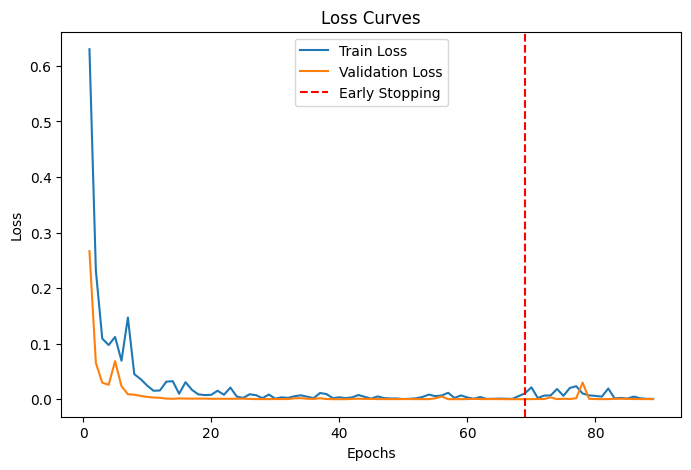

Best model saved to 'dual_input_cnn_finetuned.pth'


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import drive

# === Mount Google Drive ===
drive.mount('/content/drive')

# === Dataset class ===
class SpoofDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        rgb_image = row['RGB']
        lbp_image = row['LBP']
        label = torch.tensor(row['label'], dtype=torch.long)

        if self.transform:
            rgb_image = self.transform(rgb_image)
            lbp_image = self.transform(lbp_image)

        return rgb_image, lbp_image, label

# === Training function ===
def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=100, patience=10):
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    patience_counter = 0
    early_stopping_epoch = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for rgb_images, lbp_images, labels in train_loader:
            rgb_images, lbp_images, labels = rgb_images.to(device), lbp_images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(rgb_images, lbp_images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for rgb_images, lbp_images, labels in val_loader:
                rgb_images, lbp_images, labels = rgb_images.to(device), lbp_images.to(device), labels.to(device)
                outputs = model(rgb_images, lbp_images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            early_stopping_epoch = epoch + 1
            torch.save(model.state_dict(), 'dual_input_cnn_finetuned.pth')
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Plot loss
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label='Early Stopping')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print("Best model saved to 'dual_input_cnn_finetuned.pth'")

# === Main Training Script ===
if __name__ == "__main__":
    df = adjust_dataset  # Ganti dengan DataFrame yang kamu gunakan

    train_df, val_df = train_test_split(df, test_size=0.15, random_state=42)

    # Transformasi data untuk training (augmentasi)
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop(size=(240, 240), scale=(0.8, 1.0)),
        transforms.ToTensor()
    ])

    transform = transforms.Compose([
        transforms.Resize((240, 240)),
        transforms.ToTensor()
    ])

    train_dataset = SpoofDataset(train_df, transform=train_transform)
    val_dataset = SpoofDataset(val_df, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = DualInputCNN(num_classes=2).to(device)

    # === Load model from Google Drive ===
    gdrive_path = '/content/drive/MyDrive/dual_input_cnn.pth'  # Ganti path ini sesuai lokasi di Drive
    model.load_state_dict(torch.load(gdrive_path, map_location=device))

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=5e-5, weight_decay=1e-3)

    train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=200, patience=20)

# Testing dengan data dari Webcam

In [8]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44283 sha256=ba94c5c26f0891dfba234a190f3763e0e61bdae4fbdf8c030b717cb1f1027e11
  Stored in directory: /root/.cache/pip/wheels/bc/52/78/893c3b94279ef238f43a9e89608af648de401b96415bebbd1f
Successfully built grad-cam


In [9]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from skimage.feature import local_binary_pattern
from facenet_pytorch import MTCNN

# Inisialisasi MTCNN
mtcnn = MTCNN()

# Fungsi untuk ekstraksi LBP
def get_lbp(image, radius=1, n_points=8):
    if len(image.shape) > 2 and image.shape[2] == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    return lbp

# Fungsi untuk resize dengan padding agar aspect ratio tetap terjaga
def resize_with_padding(image, target_size=(240, 240)):
    old_size = image.size
    ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])
    new_size = (int(old_size[0] * ratio), int(old_size[1] * ratio))

    resized_image = image.resize(new_size, Image.LANCZOS)
    new_image = Image.new("RGB", target_size, (0, 0, 0))
    new_image.paste(resized_image, ((target_size[0] - new_size[0]) // 2,
                                    (target_size[1] - new_size[1]) // 2))
    return new_image

# Fungsi untuk memproses gambar input dan hanya ambil 1 wajah
def process_input_image(image_path):
    data = []

    # Baca gambar
    image = Image.open(image_path).convert('RGB')

    # Deteksi wajah
    faces, _ = mtcnn.detect(image)
    if faces is not None and len(faces) > 0:
        print(f'Found {len(faces)} face(s) in the image')

        # Pilih wajah terbesar berdasarkan luas bbox (x2-x1)*(y2-y1)
        largest_face = max(faces, key=lambda box: (box[2] - box[0]) * (box[3] - box[1]))
        x1, y1, x2, y2 = [int(coord) for coord in largest_face]

        face = image.crop((x1, y1, x2, y2))
        if face.size != (0, 0):
            face = resize_with_padding(face, (240, 240))

            # Ekstraksi LBP
            face_np = np.array(face)
            lbp = get_lbp(face_np)

            if lbp is None:
                print("LBP extraction failed. Skipping this image.")
                return pd.DataFrame()  # Return empty DataFrame

            data.append({
                'RGB': face,
                'LBP': Image.fromarray(lbp.astype(np.uint8)),
                'label': 'unknown'
            })
    else:
        print('No faces found in the image.')

    return pd.DataFrame(data)

In [10]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from PIL import Image
import numpy as np

# Wrapper untuk pakai GradCAM hanya di input RGB
class RGBOnlyModel(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        lbp_dummy = torch.zeros(x.size(0), 1, x.size(2), x.size(3)).to(x.device)
        return self.model(x, lbp_dummy)

# Grad-CAM test dari dataset hasil crop wajah
def test_model_with_gradcam(model, dataset, device):
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    wrapped_model = RGBOnlyModel(model)  # Bungkus model biar bisa dipakai Grad-CAM
    target_layer = wrapped_model.model.conv5  # Layer yang akan diinspeksi

    for i, row in dataset.iterrows():
        rgb_img = row['RGB']
        lbp_img = row['LBP']

        # Transform ke tensor
        rgb_tensor = transform(rgb_img).unsqueeze(0).to(device)
        lbp_tensor = transform(lbp_img).unsqueeze(0).to(device)

        # Pastikan input RGB perlu gradien (agar Grad-CAM bisa backward)
        rgb_tensor.requires_grad = True

        # Forward pass untuk prediksi
        outputs = model(rgb_tensor, lbp_tensor)
        _, predicted = torch.max(outputs, 1)
        label = 'Real' if predicted.item() == 0 else 'Fake'

        # Grad-CAM (hanya pada RGB channel)
        with GradCAM(model=wrapped_model, target_layers=[target_layer]) as cam:
            targets = [ClassifierOutputTarget(predicted.item())]
            grayscale_cam = cam(input_tensor=rgb_tensor, targets=targets)[0]

        # Visualisasi
        input_image = rgb_tensor.squeeze().detach().cpu().permute(1, 2, 0).numpy()
        input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
        cam_image = show_cam_on_image(input_image, grayscale_cam, use_rgb=True)

        # Tampilkan hasil
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(row['RGB'])
        axes[0].set_title(f"RGB Image - Pred: {label}")
        axes[0].axis('off')

        axes[1].imshow(row['LBP'], cmap='gray')
        axes[1].set_title("LBP Image")
        axes[1].axis('off')

        axes[2].imshow(cam_image)
        axes[2].set_title("Grad-CAM (RGB Only)")
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        if i >= 4:
            break

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DualInputCNN(num_classes=2).to(device)
model.load_state_dict(torch.load('/content/dual_input_cnn_finetuned.pth', map_location=device))
model.eval()

DualInputCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_conv1): Dropout(p=0.3, inplace=False)
  (conv1_lbp): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_lbp): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_lbp): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_conv2): Dropout(p=0.3, inplace=False)
  (conv4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout_conv3): Dropout(p=0.3, inplace=False)
  (adaptive_pool): AdaptiveAvgPool2d(output_size=(7, 7))
  (fc1): Linear(in_features=25088, out_features=512, bias=Tru

Found 1 face(s) in the image


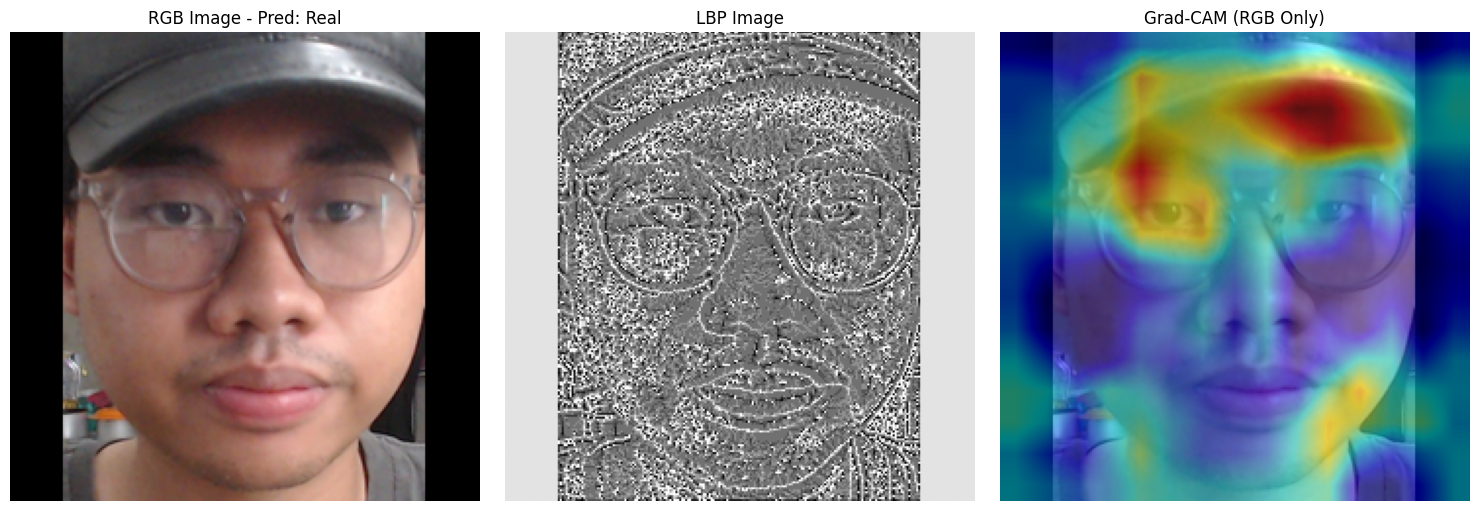

In [30]:
# Testing
dataset_1 = process_input_image('/content/Test_1.jpg')
# Jalankan evaluasi + Grad-CAM
test_model_with_gradcam(model, dataset_1, device)

Found 1 face(s) in the image


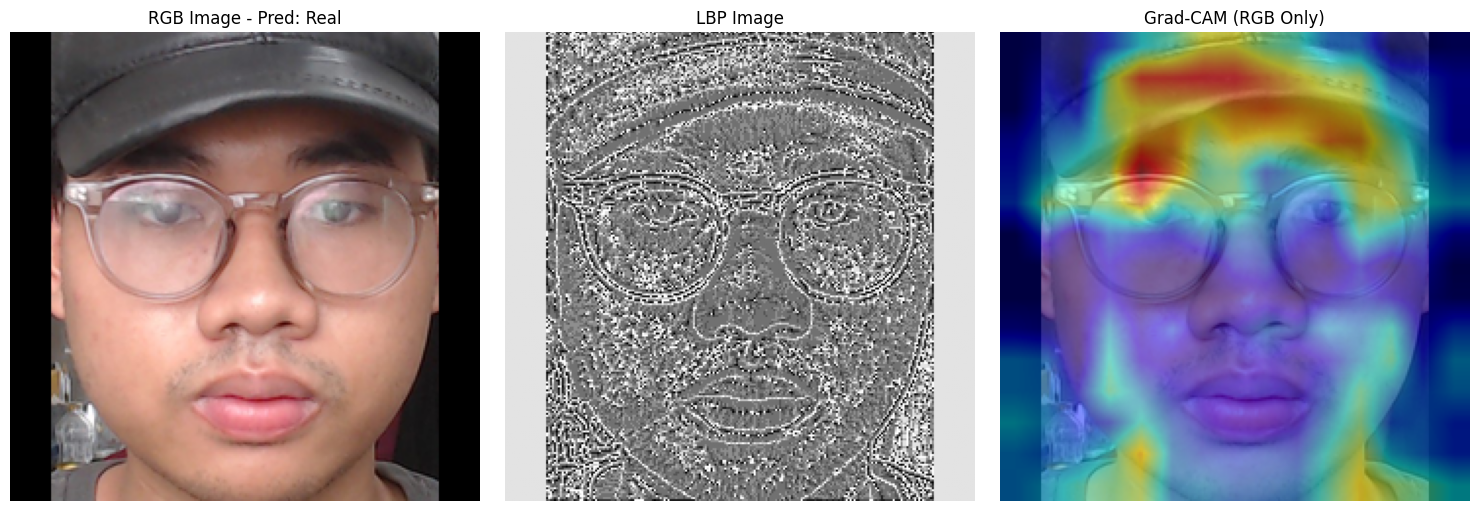

In [31]:
dataset_2 = process_input_image('/content/Test_2.jpg')
test_model_with_gradcam(model, dataset_2, device)

Found 1 face(s) in the image


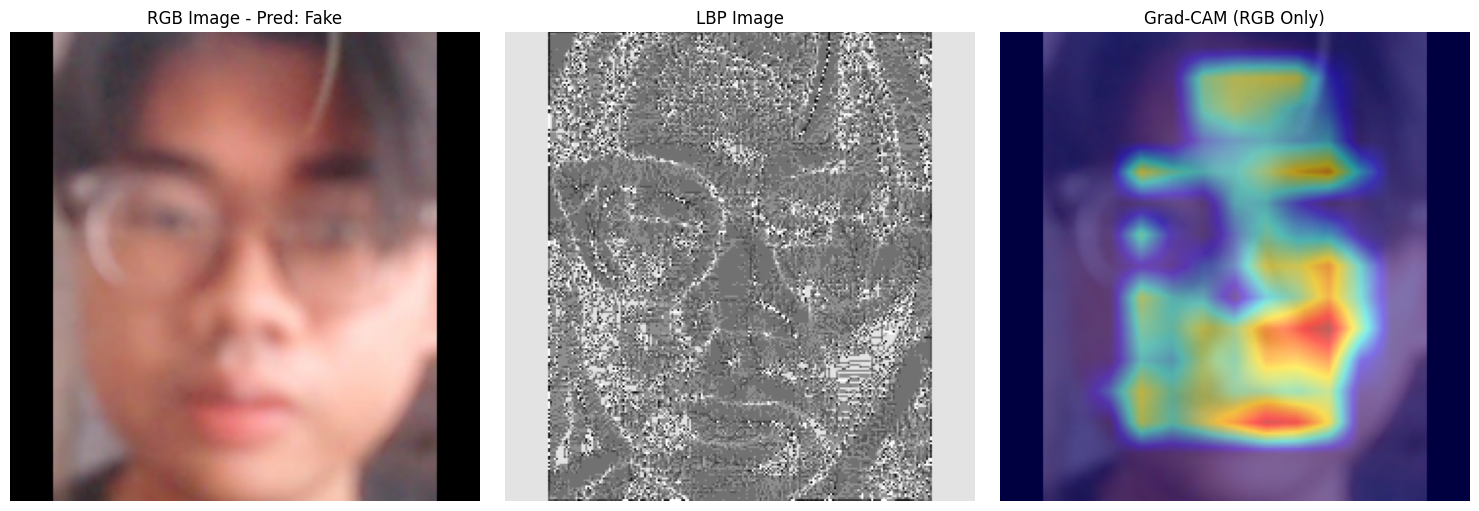

In [32]:
dataset_3 = process_input_image('/content/Test_3.jpg')
test_model_with_gradcam(model, dataset_3, device)

Found 2 face(s) in the image


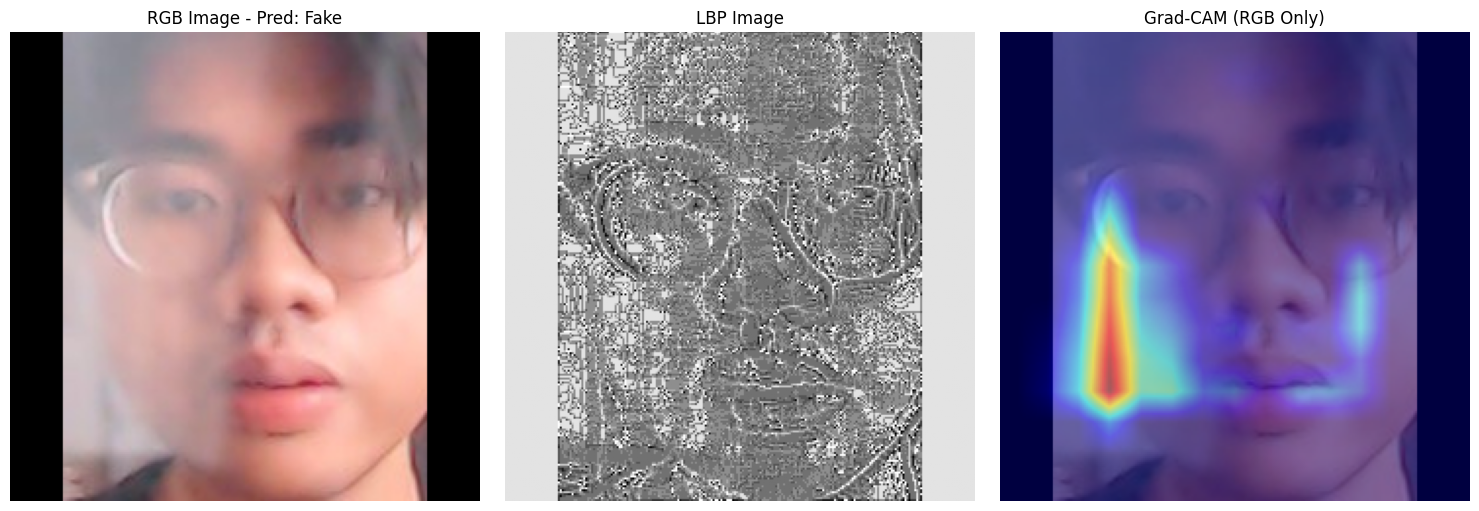

In [33]:
# Contoh penggunaan
dataset_4 = process_input_image('/content/Test_4.jpg')
test_model_with_gradcam(model, dataset_4, device)

Found 1 face(s) in the image


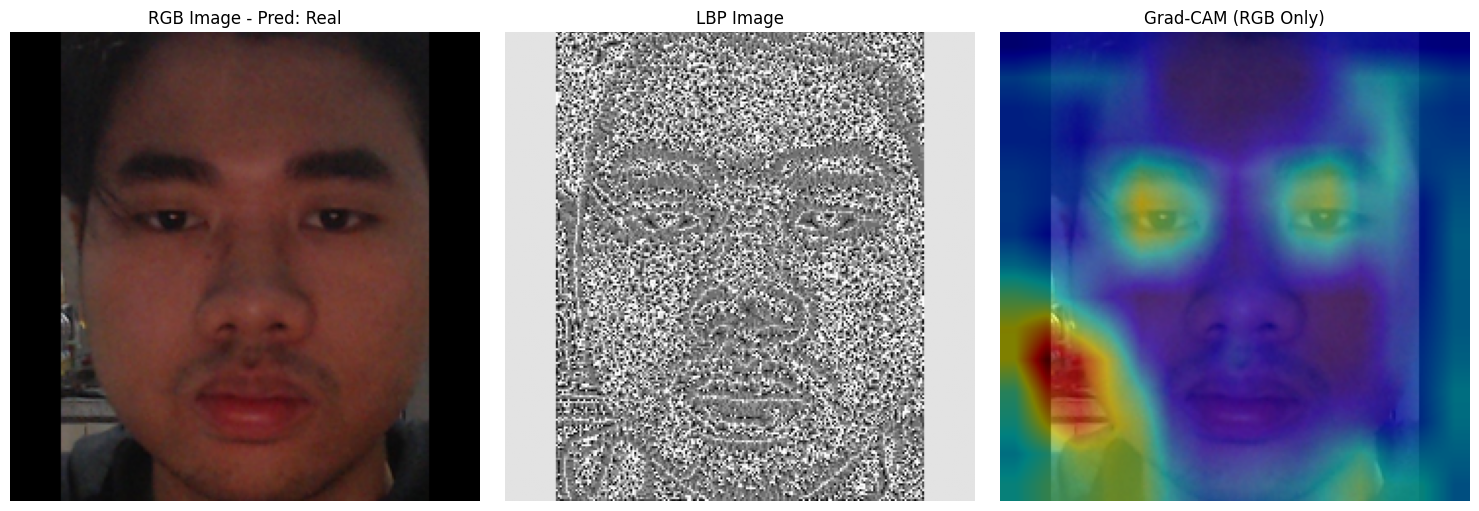

In [34]:
# Contoh penggunaan
dataset_5 = process_input_image('/content/Test_B.jpg')
test_model_with_gradcam(model, dataset_5, device)